In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [38]:
df = pd.read_csv(r"C:\Downloads\Corn_data_merged_3_region\Corn_yield_all_years_3region.csv")
print("Kích thước dữ liệu:", df.shape)
df.head()

Kích thước dữ liệu: (360, 8)


,year,state_name,state_alpha,region,planted_all,harvested_grain,yield_grain,production_grain
0,2005,COLORADO,CO,Semi-Arid Continental,280000,235000,38.5,9040000
1,2005,IOWA,IA,Temperate Humid,12800000,12500000,173.0,2162500000
2,2005,ILLINOIS,IL,Temperate Humid,12100000,11950000,143.0,1708850000
3,2005,INDIANA,IN,Temperate Humid,5900000,5770000,154.0,888580000
4,2005,KANSAS,KS,Semi-Arid Continental,2060000,1940000,94.0,182800000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              360 non-null    int64  
 1   state_name        360 non-null    object 
 2   state_alpha       360 non-null    object 
 3   region            360 non-null    object 
 4   planted_all       360 non-null    int64  
 5   harvested_grain   360 non-null    int64  
 6   yield_grain       360 non-null    float64
 7   production_grain  360 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 22.6+ KB


In [40]:
cols_to_describe = ['planted_all', 'harvested_grain', 'yield_grain',"production_grain"]
df[cols_to_describe].describe(include='all')

,planted_all,harvested_grain,yield_grain,production_grain
count,3.600000e+02,3.600000e+02,360.000000,3.600000e+02
mean,4.233575e+06,3.943212e+06,142.924722,6.365435e+08
std,3.646910e+06,3.582912e+06,37.334133,6.755668e+08
min,2.800000e+05,2.350000e+05,17.500000,5.330000e+06
25%,1.350000e+06,1.117500e+06,122.000000,1.448612e+08
50%,3.400000e+06,3.000000e+06,148.000000,4.071075e+08
75%,5.600000e+06,5.255000e+06,171.000000,7.999925e+08
max,1.420000e+07,1.390000e+07,217.000000,2.740500e+09


In [41]:
print("\nCác vùng:", df['region'].unique())
print("Khoảng năm:", df['year'].min(), "-", df['year'].max())


Các vùng: ['Semi-Arid Continental' 'Temperate Humid' 'Subtropical Humid']
Khoảng năm: 2005 - 2024


In [42]:
region_stats = df.groupby('region')['yield_grain'].describe().round(2)
display(region_stats)

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Semi-Arid Continental,120.0,113.81,36.76,17.5,90.40,121.4,137.12,194.0
Subtropical Humid,60.0,139.42,30.06,68.0,117.75,140.5,168.00,192.0
Temperate Humid,180.0,163.51,24.51,75.0,147.75,163.5,178.25,217.0


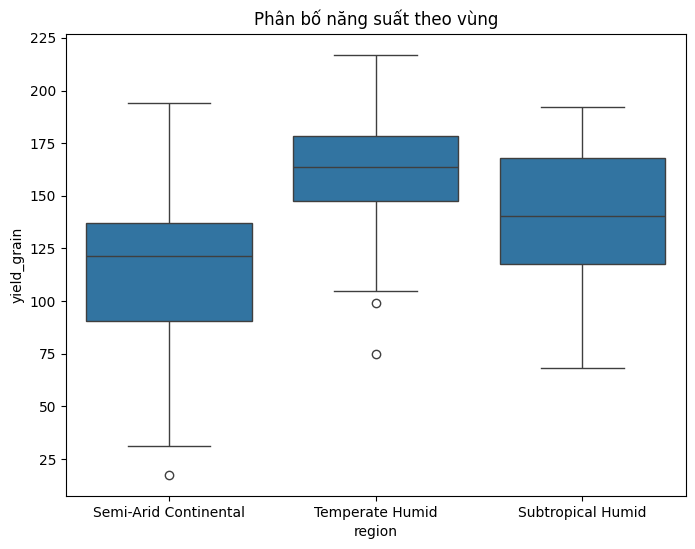

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(x='region', y='yield_grain', data=df)
plt.title("Phân bố năng suất theo vùng")
plt.show()

In [44]:
df[df['yield_grain'] < 50][['year', 'region', 'yield_grain']]


,year,region,yield_grain
0,2005,Semi-Arid Continental,38.5
18,2006,Semi-Arid Continental,32.0
54,2008,Semi-Arid Continental,45.0
88,2009,Semi-Arid Continental,48.0
124,2011,Semi-Arid Continental,40.8
126,2012,Semi-Arid Continental,17.5
130,2012,Semi-Arid Continental,49.0
144,2013,Semi-Arid Continental,31.0


In [45]:
# Đảm bảo cột 'year' là số và không bị NaN
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year', 'region', 'yield_grain'])
df['year'] = df['year'].astype(int)

# Gom trung bình năng suất theo vùng và năm
year_region = (
    df.groupby(['year', 'region'], as_index=False)['yield_grain']
      .mean()
      .sort_values(['region', 'year'])
)

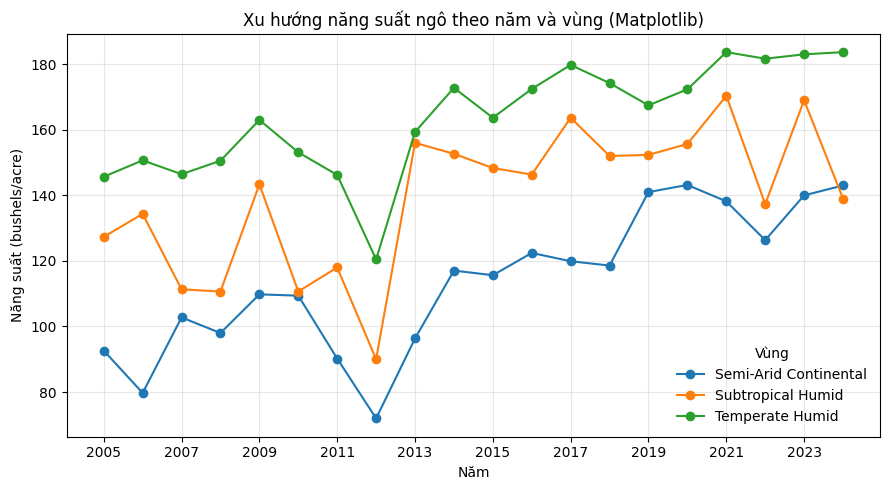

In [46]:
plt.figure(figsize=(9,5))

# Vẽ từng vùng bằng vòng lặp
for region, sub_df in year_region.groupby('region'):
    plt.plot(sub_df['year'], sub_df['yield_grain'], marker='o', label=region)

plt.title("Xu hướng năng suất ngô theo năm và vùng (Matplotlib)")
plt.xlabel("Năm")
plt.ylabel("Năng suất (bushels/acre)")

# Làm tròn & chia khoảng đều cho trục năm
years = np.arange(year_region['year'].min(), year_region['year'].max() + 1, 2)
plt.xticks(years.astype(int))

plt.legend(title="Vùng", frameon=False)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()